## PAUL SENTONGO -- B00327

In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

In [26]:
# Load the dataset
data = pd.read_csv('Social_Media_Post.csv')

In [27]:
data.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [28]:
# Check for missing values
print(data.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [29]:
# Drop columns with high missing values
data = data.drop(columns=['status_id','Column1','Column2','Column3','Column4'])

In [30]:
# Handle missing values (example: fill with 0)
data.fillna(0, inplace=True)

In [31]:
# Convert 'status_published' to datetime
data['status_published'] = pd.to_datetime(data['status_published'])

In [32]:
# Extract time-based features
data['hour'] = data['status_published'].dt.hour
data['day_of_week'] = data['status_published'].dt.dayofweek

In [33]:
# Encode 'status_type'
label_encoder = LabelEncoder()
data['status_type_encoded'] = label_encoder.fit_transform(data['status_type'])

VISUALIZING THE TARGET  VARIABLE

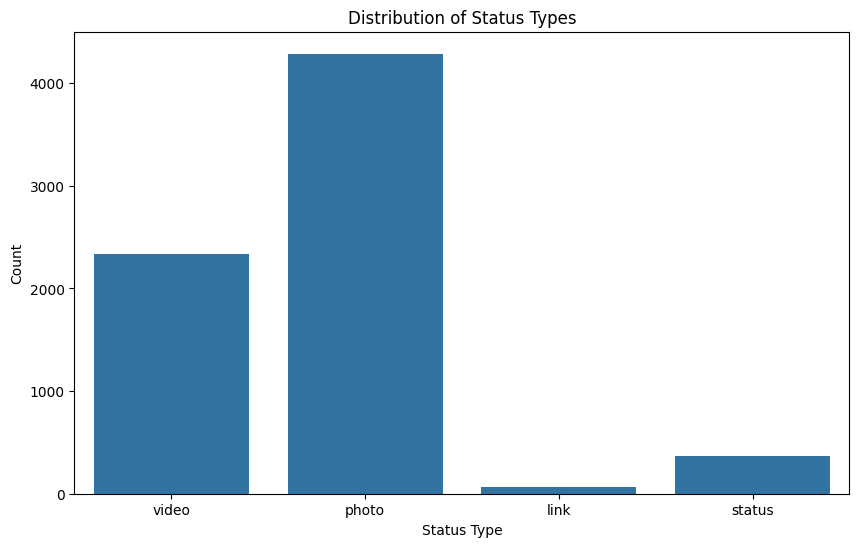

In [34]:
# 1. Distribution of status_type
plt.figure(figsize=(10, 6))
sns.countplot(x='status_type', data=data)
plt.title('Distribution of Status Types')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

ANALYZING REACTIONS

In [35]:
# 2. Reactions Distribution
reaction_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data[reaction_columns].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


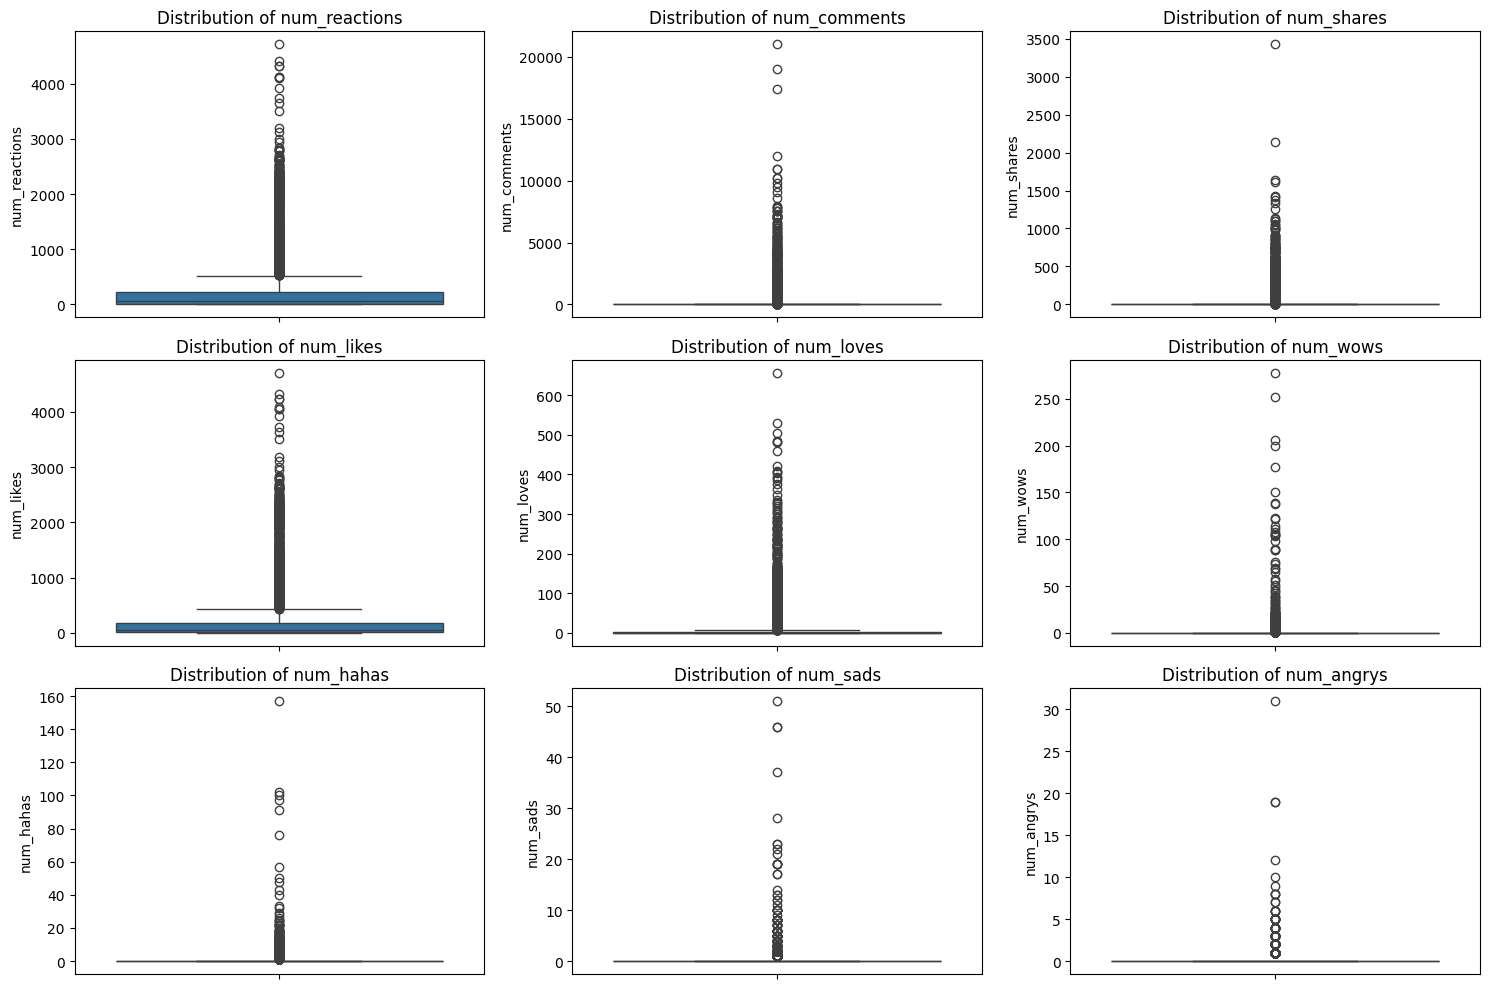

In [36]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(reaction_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=data)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

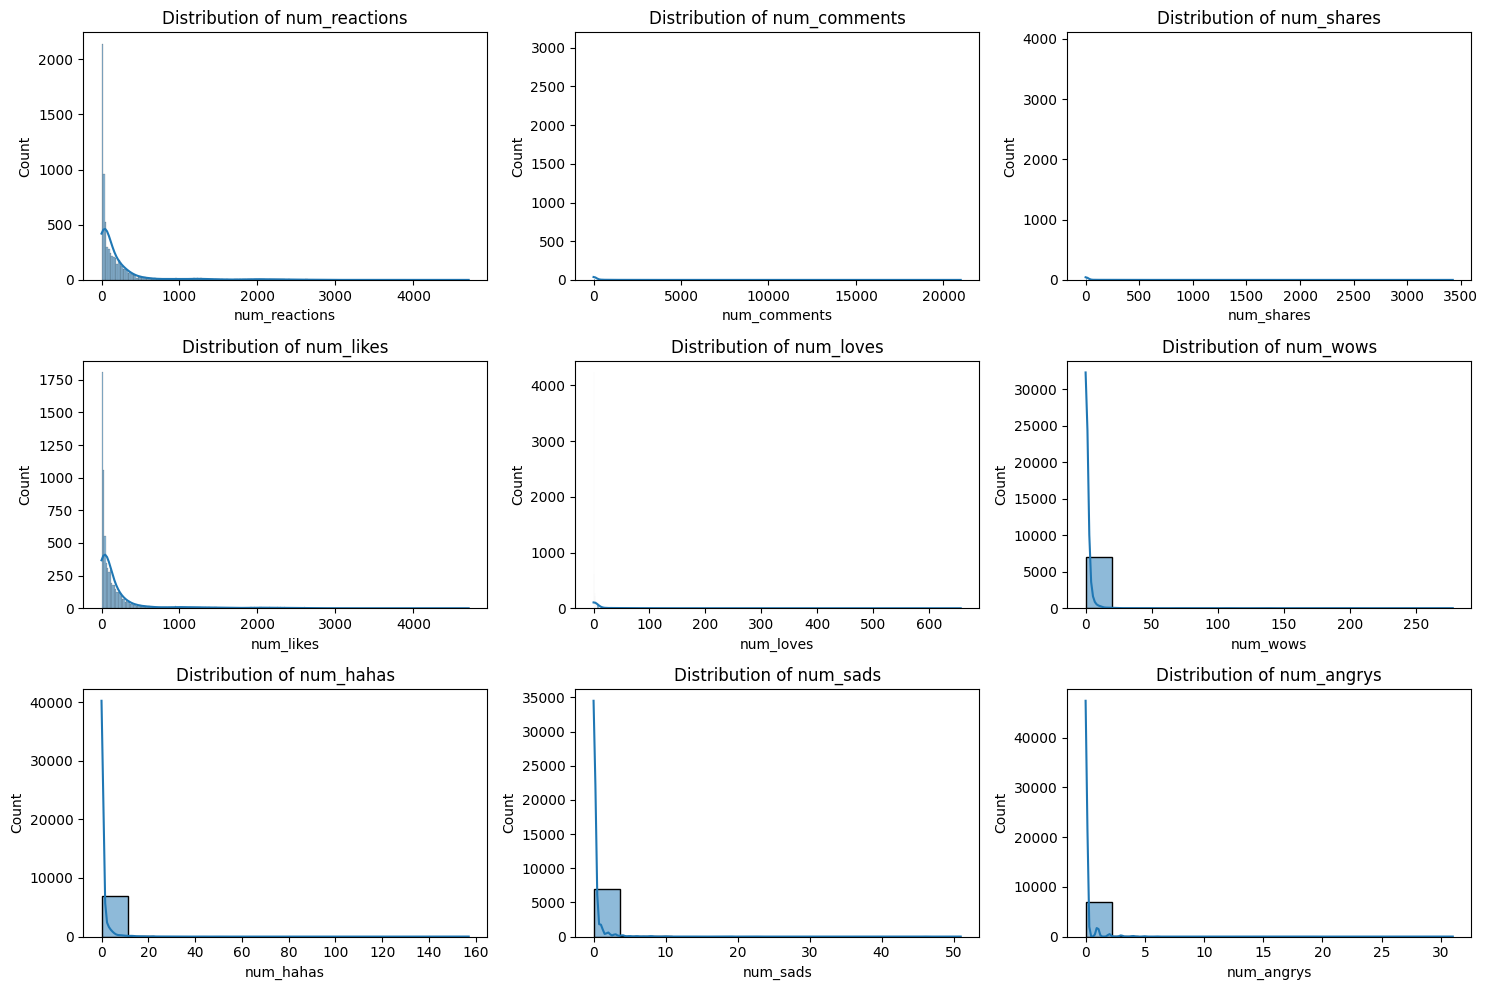

In [37]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(reaction_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

PLOTTING A TIME BASED ANALYSIS

In [38]:
# 3. Time-based Analysis
data.set_index('status_published', inplace=True)
posts_per_month = data.resample('M').size()

C:\Users\Meddieek\AppData\Local\Temp\ipykernel_15024\3452217595.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  posts_per_month = data.resample('M').size()


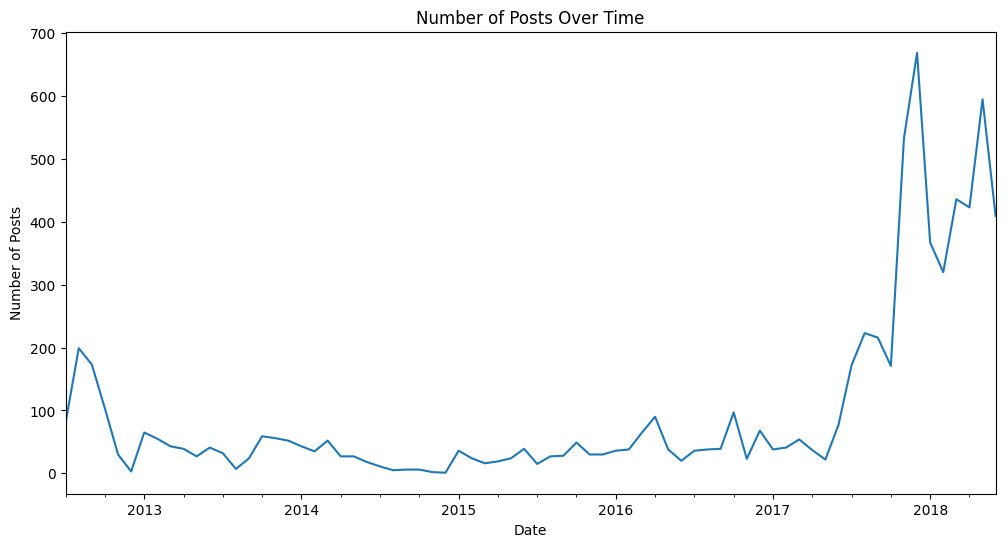

In [39]:
plt.figure(figsize=(12, 6))
posts_per_month.plot()
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

In [40]:
# Heatmap of posts by hour and day of week
hour_day_pivot = data.pivot_table(index='day_of_week', columns='hour', values='status_type', aggfunc='count')

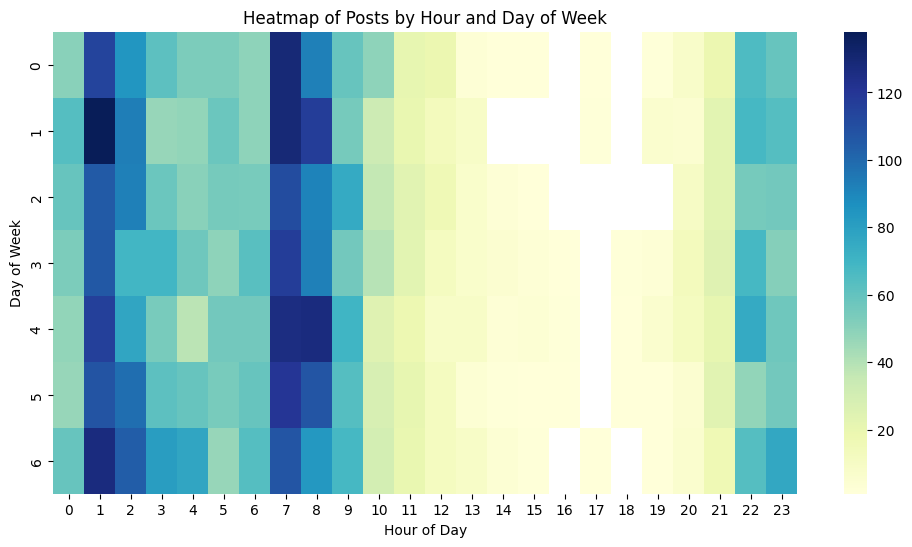

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(hour_day_pivot, cmap='YlGnBu')
plt.title('Heatmap of Posts by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

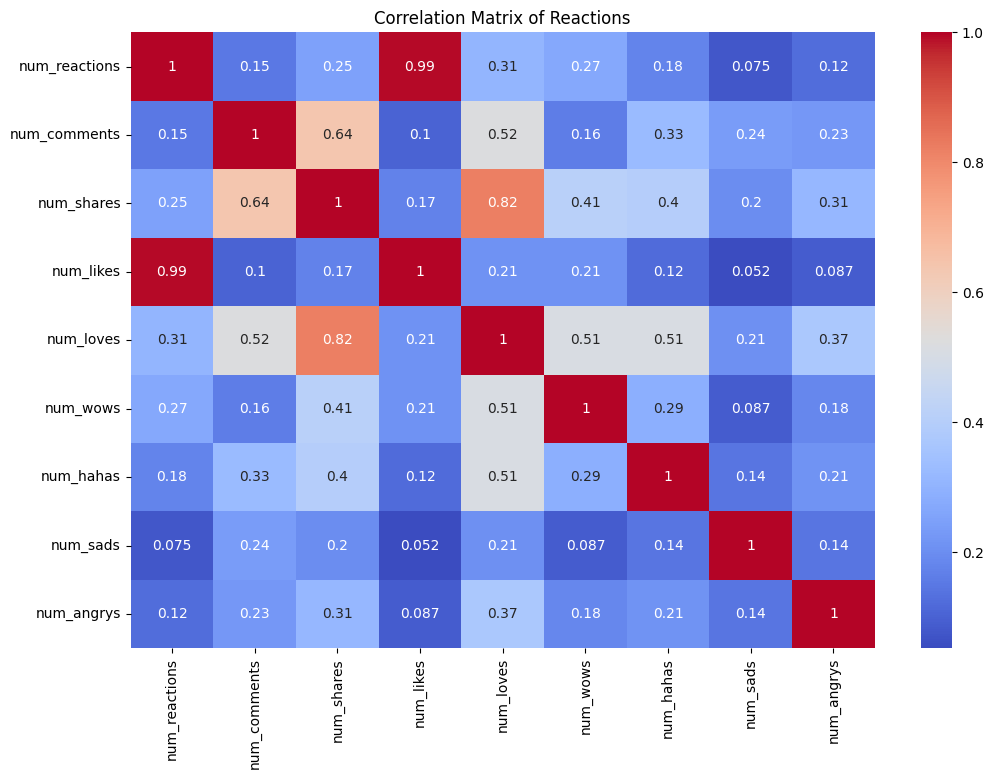

In [42]:
# 4. Correlation Heatmap
correlation_matrix = data[reaction_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Reactions')
plt.show()

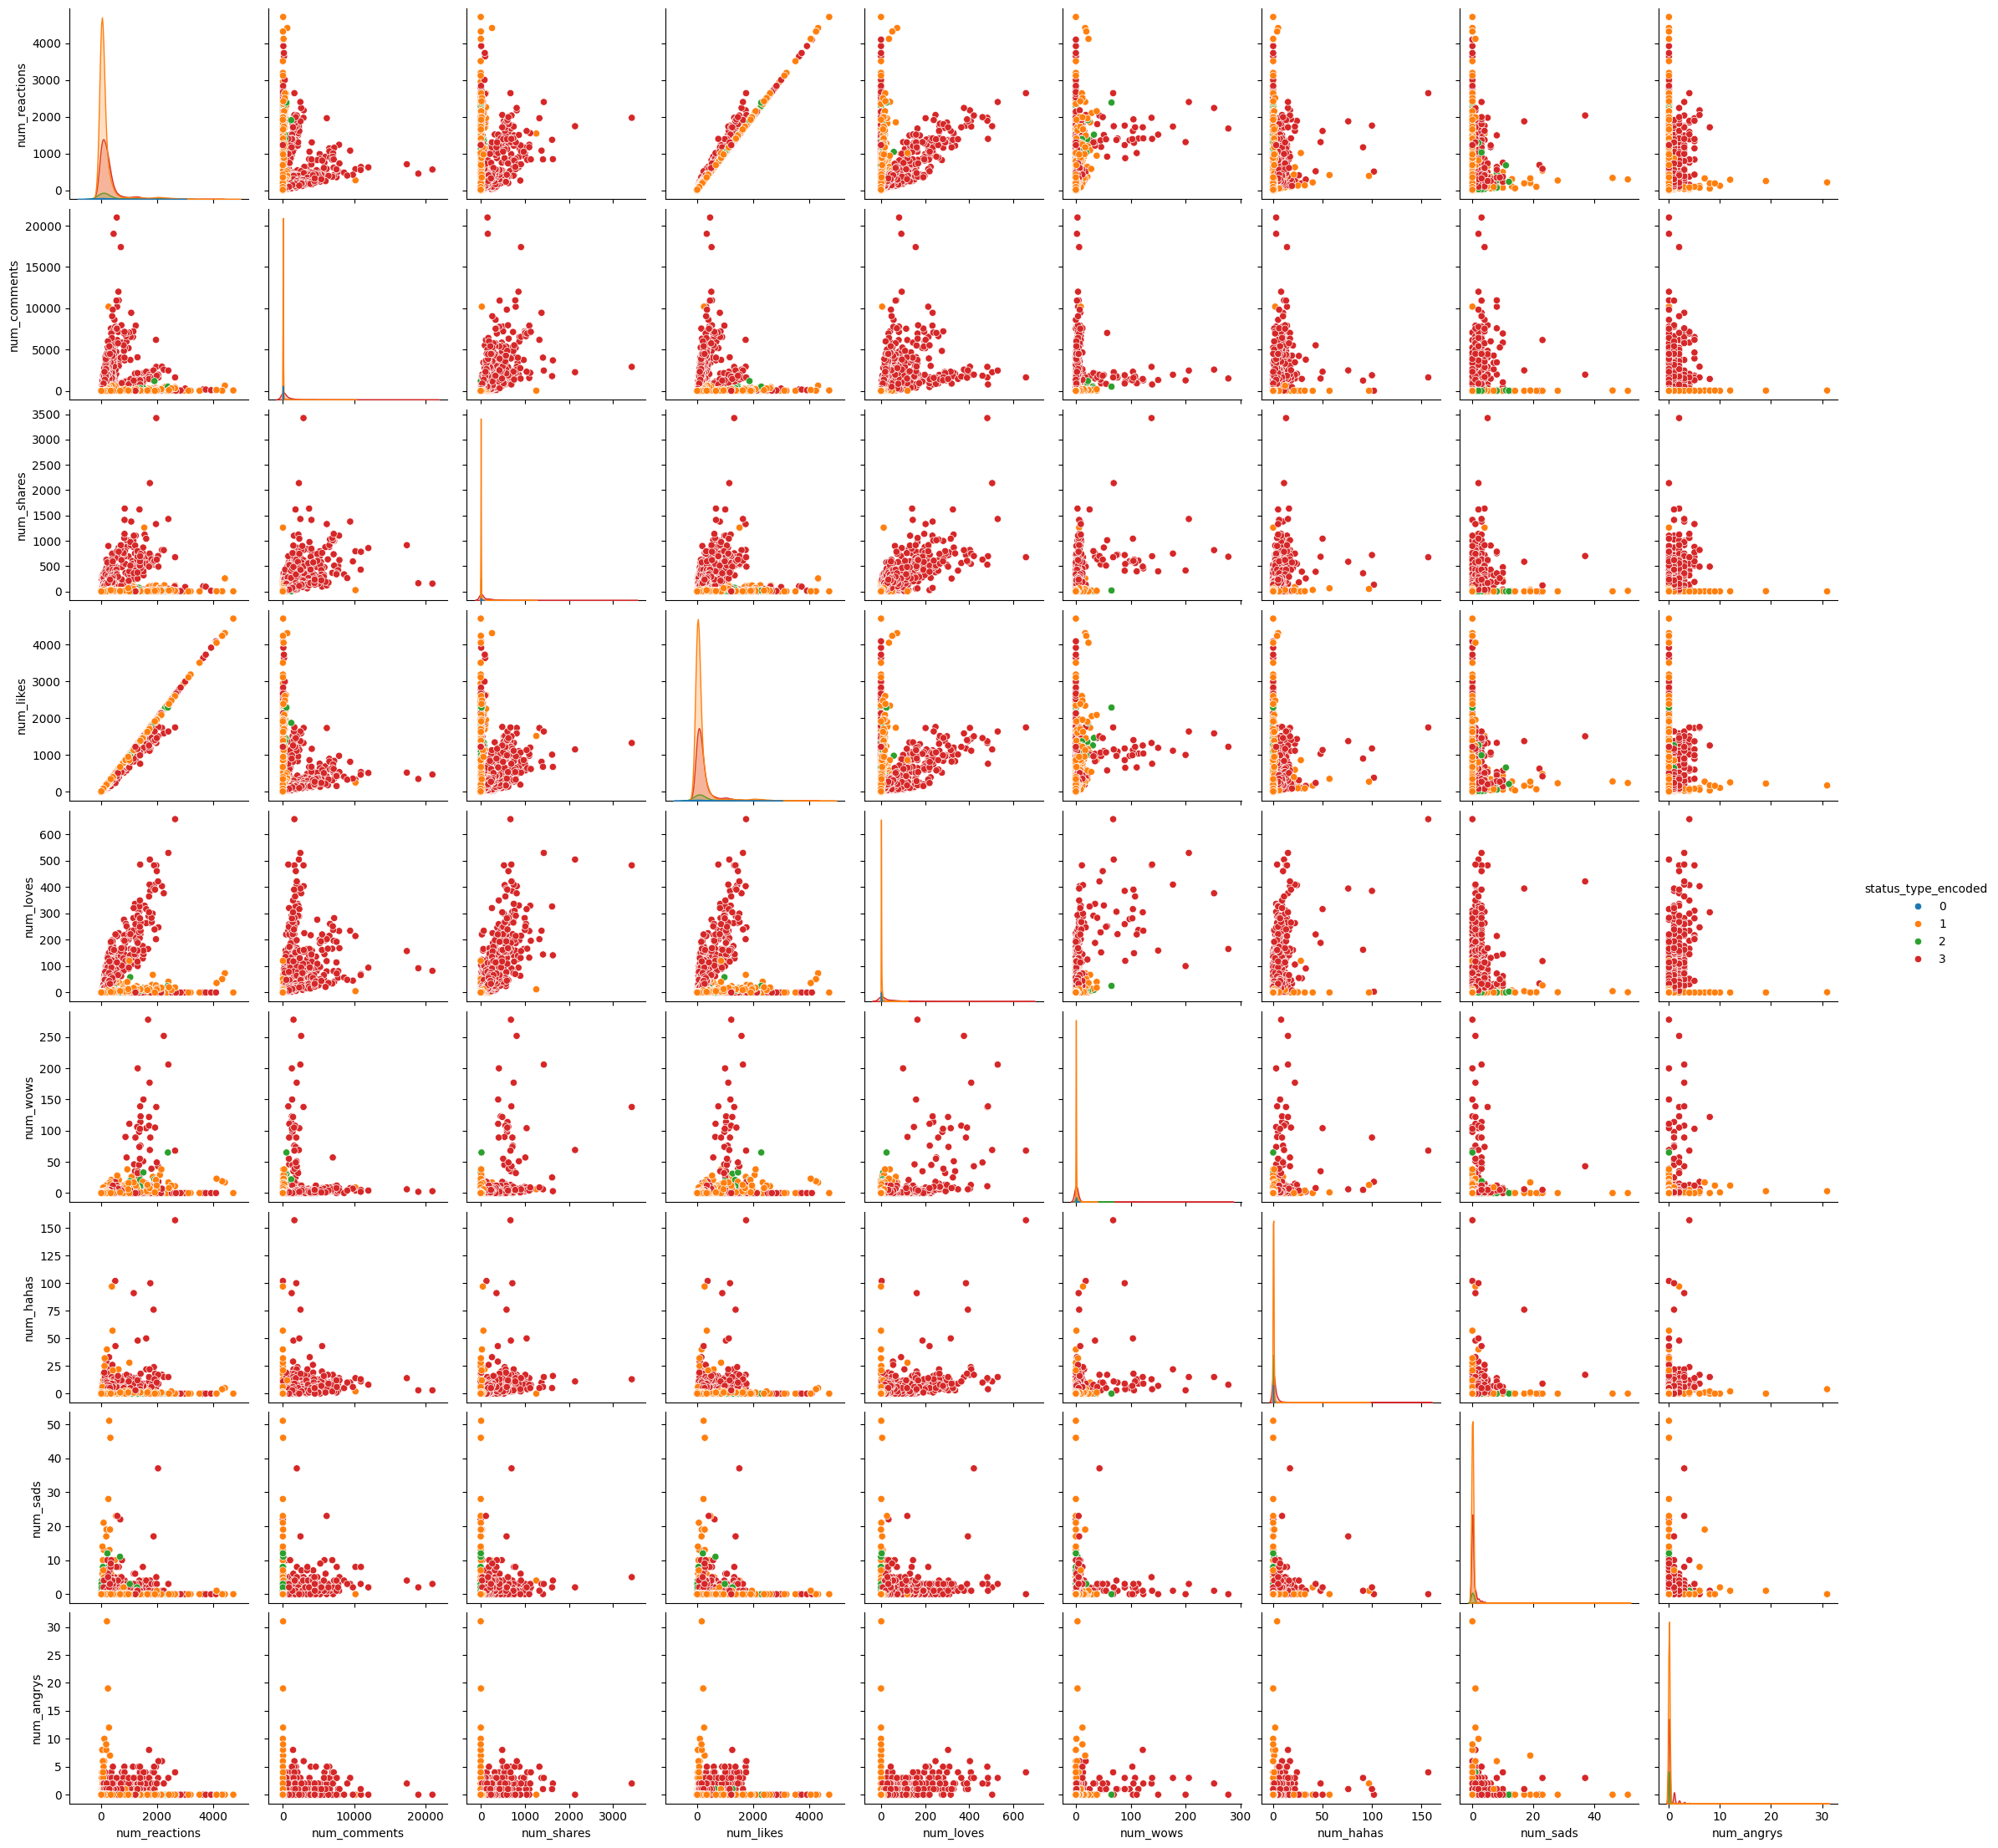

In [43]:
# 5. Pair Plots
sns.pairplot(data[reaction_columns + ['status_type_encoded']], hue='status_type_encoded', palette='tab10')
plt.show()

FEATURE SELECTION

In [44]:
# Features and target variable
X = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'hour', 'day_of_week']]
y = data['status_type_encoded']

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [48]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

Accuracy: 0.8290780141843972
Precision: 0.8064998886665401
Recall: 0.8290780141843972
F1 Score: 0.813171218866656
ROC AUC Score: 0.8334673252456533
              precision    recall  f1-score   support

        link       0.00      0.00      0.00        11
       photo       0.83      0.92      0.88       883
      status       0.30      0.09      0.14        64
       video       0.85      0.77      0.81       452

    accuracy                           0.83      1410
   macro avg       0.50      0.45      0.46      1410
weighted avg       0.81      0.83      0.81      1410



d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [51]:
# Train the final model with the best parameters
final_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [52]:
# Predict on the test set with the final model
final_y_pred = final_rf_model.predict(X_test_scaled)

In [53]:
# Evaluate the final model
final_accuracy = accuracy_score(y_test, final_y_pred)
final_precision = precision_score(y_test, final_y_pred, average='weighted')
final_recall = recall_score(y_test, final_y_pred, average='weighted')
final_f1 = f1_score(y_test, final_y_pred, average='weighted')
final_roc_auc = roc_auc_score(y_test, final_rf_model.predict_proba(X_test_scaled), multi_class='ovr')

print(f"Final Accuracy: {final_accuracy}")
print(f"Final Precision: {final_precision}")
print(f"Final Recall: {final_recall}")
print(f"Final F1 Score: {final_f1}")
print(f"Final ROC AUC Score: {final_roc_auc}")

# Detailed classification report for the final model
print(classification_report(y_test, final_y_pred, target_names=label_encoder.classes_))

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Final Accuracy: 0.825531914893617
Final Precision: 0.7996811485317847
Final Recall: 0.825531914893617
Final F1 Score: 0.8057960242234853
Final ROC AUC Score: 0.8581623535661258
              precision    recall  f1-score   support

        link       0.00      0.00      0.00        11
       photo       0.82      0.93      0.87       883
      status       0.27      0.05      0.08        64
       video       0.85      0.75      0.80       452

    accuracy                           0.83      1410
   macro avg       0.49      0.43      0.44      1410
weighted avg       0.80      0.83      0.81      1410



d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [54]:
# Save the final model
joblib.dump(final_rf_model, 'final_rf_model.joblib')

['final_rf_model.joblib']

## ANALYSIS OF THE PERFORMANCE METRICS

Performance Metrics:
Final Accuracy: 0.8255 (82.55%)

This indicates that 82.55% of the posts were correctly classified by the model. Accuracy is a useful metric when the class distribution is fairly balanced, as it gives a general sense of how often the classifier is correct.
Final Precision: 0.7997 (79.97%)

Precision measures the proportion of true positive classifications among all positive predictions. A precision of 79.97% means that when the model predicts a certain status_type, it is correct approximately 80% of the time. High precision indicates a low false positive rate.
Final Recall: 0.8255 (82.55%)

Recall (or sensitivity) measures the proportion of true positive classifications among all actual positive instances. A recall of 82.55% means that the model correctly identifies 82.55% of all true status_type instances. High recall indicates a low false negative rate.
Final F1 Score: 0.8058 (80.58%)

The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. An F1 score of 80.58% indicates a good balance between precision and recall.
Final ROC AUC Score: 0.8582 (85.82%)

The ROC AUC Score measures the ability of the classifier to distinguish between classes. An AUC of 85.82% indicates that the model has a high capacity to correctly discriminate between different status_type classes.
Detailed Classification Report:
Link

Precision: 0.00, Recall: 0.00, F1-Score: 0.00
The model struggles with the link class, likely due to the very small number of instances (support: 11), which can lead to poor learning and prediction performance for this category.
Photo

Precision: 0.82, Recall: 0.93, F1-Score: 0.87
The model performs exceptionally well for the photo class, which has the highest support (883 instances). The high recall indicates that the model is very good at identifying photo posts, and the high precision shows that most of the predicted photo posts are correct.
Status

Precision: 0.27, Recall: 0.05, F1-Score: 0.08
Performance for the status class is quite poor, with low precision and recall. This could be due to the relatively small number of instances (support: 64) and possibly higher similarity of status posts to other types, making it harder for the model to distinguish them.
Video

Precision: 0.85, Recall: 0.75, F1-Score: 0.80
The model performs well on the video class, with good precision and recall. The slight drop in recall compared to precision indicates that some video posts might be misclassified into other classes.
Macro and Weighted Averages:
Macro Average

Precision: 0.49, Recall: 0.43, F1-Score: 0.44
The macro average gives equal weight to each class, regardless of the number of instances. The lower scores reflect the poor performance on the minority classes (link and status).
Weighted Average

Precision: 0.80, Recall: 0.83, F1-Score: 0.81
The weighted average takes into account the number of instances for each class, providing a more balanced view of the model's overall performance. These metrics are higher and more reflective of the model's performance on the majority classes (photo and video).

### OVERRALL
The Random Forest classifier achieves good overall performance, especially on the photo and video classes, which are well-represented in the dataset. However, the model struggles with the link and status classes, likely due to their lower representation. The strong accuracy, precision, recall, and F1 scores indicate that the model is effective for most practical purposes, but further improvements could focus on handling the minority classes better, possibly by gathering more data or using techniques such as oversampling, undersampling, or more advanced models that handle class imbalance.

### THE END